In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil import parser
from datetime import datetime
import json


In [79]:
levels = pd.read_csv('sp21-levels.csv')
levels.head()

advanced = levels[levels['level'] == 'advanced']
intermediate = levels[levels['level'] == 'intermediate']
beginner = levels[levels['level'] == 'beginner']

advanced.head()

,Unnamed: 0,id_email,ranking,languages,prior courses,age,level
17,17,56539.0,5,"Python, Java, C/C++, Swift","AP Computer Science A, Other High School progr...",12 years old or younger,advanced
18,18,55891.0,4,"Python, JavaScript, Scratch/SNAP",AP Computer Science Principles,12 years old or younger,advanced
94,94,56322.0,3,"Python, Java, Scratch/SNAP",NaN,12 years old or younger,advanced
154,154,56609.0,4,"Python, Java",AP Computer Science Principles,12 years old or younger,advanced
196,196,56522.0,4,"Python, Java, C/C++, JavaScript",AP Computer Science A,12 years old or younger,advanced


In [80]:
def get_assignment_df_level(level, temp1):
    temp = None
    if level == 'advanced':
        advanced_ids = list(advanced['id_email'])
        
        temp = temp1[[sid in advanced_ids for sid in temp1['student_id']]]
    
    elif level == 'intermediate':
        intermediate_ids = list(intermediate['id_email'])
        
        temp = temp1[[sid in intermediate_ids for sid in temp1['student_id']]]
    
    else:
        beginner_ids = list(beginner['id_email'])
        
        temp = temp1[[sid in beginner_ids for sid in temp1['student_id']]]
    
    return temp
    

In [85]:
name = 'lab02-sp21.csv' # edit this
sp22 = 'sp22' in name
columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']
if sp22:
    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

assignment_df = pd.read_csv(name, usecols=[i for i in range(len(columns))]) # 2 is data
assignment_df.columns = columns
assignment_df = get_assignment_df_level("beginner", assignment_df)

assignment_df.head()

len(np.unique(assignment_df['student_id']))

594

In [86]:
def reject_outliers(data, m = 10.):
    print(len(data))
    d = np.abs(data - np.median(data))
    print(d)
    mdev = np.median(d)
    print(mdev)
    s = d/mdev if mdev else 0.
    return data[s<m]

def generate_num_attempts(name, questions, q):
    assignments = assignment_df.assignment.unique()
    assignment_now = 'cal/cs61a/sp21/lab02' # edit this 
    students = assignment_df.student_id.unique()
    
    is_assignment = assignment_df.assignment_id == assignment_now
    assignment_data = assignment_df[is_assignment]
    assignment_students = assignment_data.student_id.unique()
    
    name = 'lab02-sp21.csv'
    sp22 = 'sp22' in name

    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']
    if sp22:
        columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

    
    grading_students = assignment_df[assignment_df.message_type == 'grading'].student_id.unique()
    no_grading_students = [student for student in assignment_students if student not in grading_students]
    
    # compute number of attempts per question / edit questions here

    student = 21969
    num_attempts_per_question = {question: {student: 0 for student in grading_students} for question in questions}
    for student in grading_students:
        for row in assignment_df[(assignment_df.student_id == student) & (assignment_df.message_type == 'grading')].itertuples():
        
            data = json.loads(row.data)
            if len(list(data)) != 1:
                continue
            question = list(data)[0]
            if question in num_attempts_per_question:
                num_attempts_per_question[question][student] += 1
    
#     for q in questions:
#         temp = np.array(list(num_attempts_per_question[q].values()))
#         plt.figure()
#         print(q + " Number of Attempts Summary Statistics")
#         plt.hist(list(temp))
#         plt.show()
#         print(pd.DataFrame(temp).describe())
    temp = np.array(list(num_attempts_per_question[q].values()))
    temp = reject_outliers(temp)
    plt.figure()
    print(q + " Number of Attempts Summary Statistics")
    plt.hist(list(temp))
    plt.show()
    temp_final = pd.DataFrame(temp)
    
    print(temp_final.describe())
    
    return temp_final
    

585
[ 1.  2.  1.  1.  1.  3.  2.  6.  1.  2.  2.  2.  1. 15.  3.  1.  2. 36.
  3.  4.  3.  3.  1.  3.  3.  1.  3.  1.  4.  3.  6.  1.  0.  4.  2.  3.
  7.  1.  2.  2.  3. 16.  3.  2.  2. 13.  2.  3. 15.  1.  1.  3.  7.  2.
 22.  2.  2.  1.  8.  8.  3.  1.  2.  8.  2.  1.  4.  3.  2. 25.  3.  3.
 25.  9.  2.  1.  0.  1.  3.  3.  0.  3.  2.  3.  2.  1.  1. 30.  2.  2.
  2.  2.  6.  4. 22.  1.  1.  2.  3.  5. 15.  0.  3.  2.  3.  8.  3.  0.
  3.  2.  0.  1. 14.  4. 41.  3.  2. 35.  5.  5. 11. 13.  1.  9.  1.  4.
  3.  1.  3.  4. 12. 13.  3.  1. 13.  3.  1.  8. 10. 28.  3. 10.  1.  2.
  1.  5.  1.  2.  5.  1.  5.  2. 19.  0. 12.  7.  6.  3.  5.  2.  4.  8.
  2.  6.  2.  2.  3.  5.  2.  5.  3.  8.  3.  4. 23.  2.  3.  2. 50.  3.
 28.  2.  3.  1.  1.  2.  2.  3. 21.  3. 10.  0.  2.  4.  4. 16.  2.  6.
  6.  1.  3.  4.  2.  6.  0. 37. 29.  1. 48.  0.  2.  2.  3. 44.  3.  1.
  5.  8.  2.  0. 11.  2.  1.  0.  4. 10.  3. 16.  7.  3.  1.  8. 25.  3.
  3.  5. 22.  3.  0.  4. 28.  4.  3.  8.  4.  4

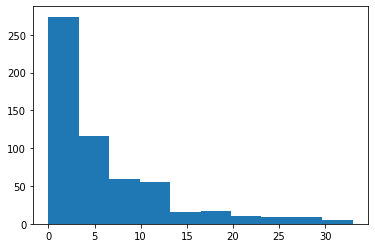

                0
count  569.000000
mean     6.128295
std      6.580439
min      0.000000
25%      2.000000
50%      4.000000
75%      9.000000
max     33.000000


,0
0,3
1,6
2,3
3,3
4,3
...,...
564,0
565,0
566,0
567,6


In [88]:
generate_num_attempts('lab02-sp21.csv', ['Lambda the Free', 'Higher Order Functions', 'hop', 'digit_index_factory', 'lambda_curry2', 'count_cond'], 'count_cond')

In [5]:
def bucket_diffs(timestamps):
    num_buckets = 0

    if len(timestamps) <= 1:
        return None
    
    result, timestamps = [], list(timestamps)
    
    initial_timestamp = parser.parse(timestamps[0])
    
    for i in range(len(timestamps) - 1):
        current_timestamp = parser.parse(timestamps[i])
        next_timestamp = parser.parse(timestamps[i + 1])
        time_temp = (next_timestamp - current_timestamp).total_seconds() / 3600
        
        
        if time_temp >= 1.2:
            num_buckets += 1
            temp_time_to_add = (current_timestamp - initial_timestamp).total_seconds() / 3600
            
            initial_timestamp = next_timestamp
            result.append(temp_time_to_add)
    
    if parser.parse(timestamps[-1]) != initial_timestamp:
        time_temp = (parser.parse(timestamps[-1]) - initial_timestamp).total_seconds() / 3600
        result.append(time_temp)
    
    return result
            

In [6]:
def generate_total_time_spent(name):
    buckets_all_students = assignment_df.groupby('student_id')['timestamp'].agg(bucket_diffs)
    
    bucket_times = [sum(bucket_list) for bucket_list in list(buckets_all_students) if bucket_list != None]
    
    plt.hist(bucket_times)
    
    print(pd.DataFrame(bucket_times).describe())


                 0
count  1068.000000
mean      1.361692
std       1.002457
min       0.000000
25%       0.647153
50%       1.172917
75%       1.827847
max       9.301944


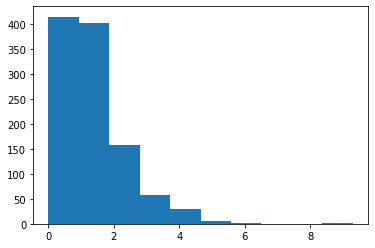

In [7]:
generate_total_time_spent('lab02-sp21.csv')

count_cond Number of Attempts Summary Statistics


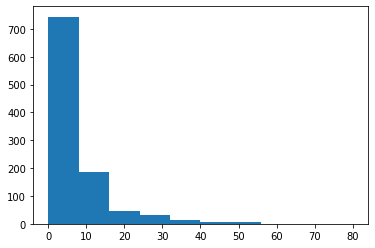

      0
0     1
1     1
2     2
3     1
4     3
...  ..
1032  3
1033  3
1034  1
1035  4
1036  1

[1037 rows x 1 columns]


In [9]:
# t test analysis 
sp_21 = generate_num_attempts('lab02-sp21.csv', ['Lambda the Free', 'Higher Order Functions', 'hop', 'digit_index_factory', 'lambda_curry2', 'count_cond'], 'count_cond')

sp_22 = pd.read_pickle("./sp_22.pkl")  

In [10]:
print(sp_22)

      0
0     0
1     2
2     0
3     0
4     0
...  ..
1040  1
1041  3
1042  5
1043  0
1044  1

[1045 rows x 1 columns]


In [11]:
np.std(sp_22[0])

8.863419803771498

In [12]:
x_1 = np.mean(sp_22[0])
x_2 = np.mean(sp_21[0])

n_1 = len(sp_22[0])
n_2 = len(sp_21[0])
var_1 = np.var(sp_22[0]) 
var_2 = np.var(sp_21[0]) 

t_denom_1 = np.sqrt(((n_1 - 1) * var_1) + ((n_2 -1) * var_2))
t_denom_2 = np.sqrt((n_2 + n_1) / (n_2 * n_1))

t = (x_2 - x_1) / (t_denom_1 * t_denom_2)
t

0.0322330743665409